In [1]:
from tkinter import *
from PIL import Image, ImageTk, ImageGrab
import numpy as np

from skimage import io


def increase_brightness(img, level=.3):
    inv_img = (255 - img) * (1 - level)
    return 255 - inv_img.astype(np.uint8)


class DrawingWindow:
    BRUSH_SIZE = 40
    BRUSH_COLOR = 'black'
    BTN_PADDING = 2
    OFFSET = 1

    def __init__(self, img_name, filename='tmp_DrawingWindow.png'):
        
        # output filename
        self.filename = filename
        
        # init window
        self.root = Tk()
        self.root.wm_title(img_name)
        
        # load image
        self.img_name = img_name
        #img = Image.open(img_name)
        img = io.imread(img_name)
        img = increase_brightness(img)
        img = Image.fromarray(img)
        
        self.img_render = ImageTk.PhotoImage(img)

        # init canvas
        self.canvas = Canvas(self.root, width=img.width, height=img.height)
        self.canvas.create_image(0, 0, anchor=NW, image=self.img_render)
        self.canvas.bind("<B1-Motion>", self.paint)
        self.canvas.pack(expand=YES, fill=BOTH)

        # add buttons
        f1 = Frame(self.root)
        btn_clear = Button(f1, text="Clear", command=self.clear)
        btn_clear.pack(expand=True, side=LEFT,
                       padx=DrawingWindow.BTN_PADDING, pady=DrawingWindow.BTN_PADDING)
        btn_save = Button(f1, text="Save & Close", command=self.save)
        btn_save.pack(expand=True, side=LEFT,
                      padx=DrawingWindow.BTN_PADDING, pady=DrawingWindow.BTN_PADDING)

        f1.pack()

        # mainloop
        self.root.mainloop()

    def paint(self, event):
        x1, y1 = (event.x - DrawingWindow.OFFSET), (event.y - DrawingWindow.OFFSET)
        x2, y2 = (event.x + DrawingWindow.OFFSET), (event.y + DrawingWindow.OFFSET)
        self.canvas.create_line(x1, y1, x2, y2, 
                                width=DrawingWindow.BRUSH_SIZE,
                                fill=DrawingWindow.BRUSH_COLOR, 
                                capstyle=ROUND, smooth=True)

    def save(self):
        '''
        filename, extension = self.img_name.split('.')
        filename = filename + "_mask." + extension
        '''
        
        filename= self.filename

        x1, y1 = self.canvas.winfo_rootx() + self.canvas.winfo_x(), self.canvas.winfo_rooty() + self.canvas.winfo_y()
        x2, y2 = x1 + self.canvas.winfo_width(), y1 + self.canvas.winfo_height()

        ImageGrab.grab().crop((x1, y1, x2, y2)).save(filename)
        
        # close
        self.root.destroy()
        
        

    def clear(self):
        self.canvas.delete("all")
        self.canvas.create_image(0, 0, anchor=NW, image=self.img_render)


w = DrawingWindow('images/lentilky.png')

In [10]:
import os

def draw_mask(img_path):
    filepath = 'tmp.png'
    
    
    DrawingWindow(img_path, filepath)
    
    BLACK = np.zeros([1, 1, 3])
    
    if os.path.isfile(filepath):
        mask = io.imread(filepath)
        mask = np.equal(mask, BLACK)[:, :, 0] * 255
        
        os.remove(filepath)

    
    return mask

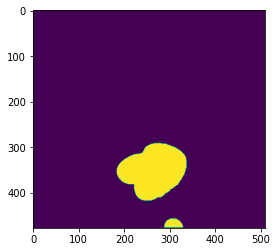

In [11]:
mask = draw_mask('images/lentilky.png')

plt.imshow(mask)
plt.show()